# install and importing project dependencies: tensorflow -> one for are gpu gestion and hub for loading movenet multiperson models(max 6 people dectection and 17 key points) :: 

In [115]:
!pip install tensorflow tensorflow-gpu tensorflow-hub opencv-python matplotlib

^C


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# For gpu use to avoid from memories error we set memory grow
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
print(gpus)
print("You are to poor for a laptop with GPU goodluck")

[]
You are to poor for a laptop with GPU goodluck


# You are to poor for a laptop with GPU goodluck

# loading movenet model multipose 

In [4]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

Model need a x32 to work proprely that meens to change are frame by 32x32 or 32x64 etc...

In [6]:
cap= cv2.VideoCapture(0) # establish the connection to our webcam
while cap.isOpened(): # while are wbcam is open : 
    ret, frame = cap.read() #ret => return value 
    
    # Resize image 
    img = frame.copy() # making a copy of our frame because we are using a 3Side image but rendering back to the frame
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256) # bigger the number are higher memory needed but I'm poor to no GPU 
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section importing the model
    results = movenet(input_img) 
    
    cv2.imshow('Movenet Multipose', frame) # show the img to the screen
    if cv2.waitKey(10) & 0xFF==ord('q'): # to break the loop press 'q' 
        break
cap.release()
cv2.destroyAllWindows()


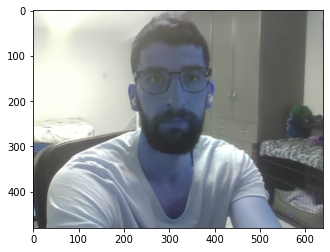

In [7]:
plt.imshow(frame)

In [14]:
#--> {'output_0': <tf.Tensor: shape=(1, 6, 56), dtype=float32, numpy=array([[[ 4.2226154e-01,......
# set of array in one sigle big one  6 peoples and 56 keypoints  ( 56 values inside of each results )
temp_R=results['output_0'].numpy()[:,:,:3]
temp_R
# y_cord=4.2226154e-01,  x_cord=7.1368498e-01,  score=6.2478161e-01, etc etc ..
# we use reshape to hve each key point for there own set of values so lets reshape

array([[[4.42976087e-01, 4.97904152e-01, 5.18920302e-01],
        [6.05779827e-01, 1.57028243e-01, 1.00459149e-02],
        [4.41642761e-01, 4.96836513e-01, 5.24788201e-01],
        [7.31103063e-01, 9.10910368e-01, 3.94769572e-03],
        [4.73293573e-01, 1.05005234e-01, 6.26816414e-04],
        [5.43639421e-01, 9.57323730e-01, 3.70922871e-03]]], dtype=float32)

In [15]:
temp=results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
temp[:1]
# 6 people 17 keypoints 3 values == [ y_cord=4.2226154e-01,  x_cord=7.1368498e-01,  score=6.2478161e-01 ]

array([[[4.4297609e-01, 4.9790415e-01, 5.1892030e-01],
        [3.6510944e-01, 5.5502170e-01, 5.8033025e-01],
        [3.7020266e-01, 4.2798218e-01, 5.9144473e-01],
        [4.0698376e-01, 6.0846925e-01, 6.4733678e-01],
        [4.1189566e-01, 3.4213182e-01, 6.4887542e-01],
        [6.3780791e-01, 6.9819498e-01, 6.5928221e-01],
        [6.7070806e-01, 1.6352963e-01, 5.0878394e-01],
        [8.7616634e-01, 7.9174244e-01, 7.5594753e-02],
        [8.7129420e-01, 1.1298689e-01, 1.8055907e-02],
        [8.5372078e-01, 6.1117429e-01, 4.4008762e-02],
        [8.0678684e-01, 3.8318029e-01, 2.5061471e-02],
        [8.8257432e-01, 5.8846170e-01, 4.3288236e-03],
        [8.7556779e-01, 3.1505907e-01, 2.5562500e-03],
        [7.2402710e-01, 6.6918361e-01, 1.2251566e-02],
        [6.6807085e-01, 1.9096293e-01, 2.7656075e-02],
        [4.2235973e-01, 5.9361261e-01, 2.2505705e-04],
        [4.7822380e-01, 4.0922970e-01, 1.2769691e-02]]], dtype=float32)

In [17]:
cap= cv2.VideoCapture(0) # establish the connection to our webcam
while cap.isOpened(): # while are wbcam is open : 
    ret, frame = cap.read() #ret => return value 
    
    # Resize image 
    img = frame.copy() # making a copy of our frame because we are using a 3Side image but rendering back to the frame
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256,256) # bigger the number are higher memory needed but I'm poor to no GPU 
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img) 
    #only key point with score-> results['output_0'].numpy()[:,:,:51] to use are rendering function in movenet lightning code
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    
    cv2.imshow('Movenet Multipose', frame) # show the img to the screen
    if cv2.waitKey(10) & 0xFF==ord('q'): # to break the loop press 'q' 
        break
cap.release()
cv2.destroyAllWindows()

# key points for the first person[0] Y=4.7146323e-01, X=5.6283820e-01, Score= 4.7767827e-01 ( how confident are model is)

In [18]:
keypoints_with_scores[0]

array([[4.2869845e-01, 5.4310805e-01, 5.8442336e-01],
       [3.6926004e-01, 5.9035569e-01, 7.2564018e-01],
       [3.6607906e-01, 4.7922480e-01, 7.7104920e-01],
       [4.0288940e-01, 6.2947798e-01, 6.9470531e-01],
       [4.0161616e-01, 3.9066845e-01, 6.6751820e-01],
       [6.1763549e-01, 7.2976857e-01, 7.8362930e-01],
       [6.2622225e-01, 2.1729024e-01, 6.1810613e-01],
       [8.7150443e-01, 8.3638519e-01, 2.2488961e-01],
       [8.6854535e-01, 2.3385942e-01, 3.0989962e-02],
       [8.3420330e-01, 7.2617471e-01, 3.4501370e-02],
       [8.5273296e-01, 3.9823976e-01, 2.1410365e-02],
       [8.7350267e-01, 6.3033557e-01, 2.0247146e-02],
       [8.8164592e-01, 3.7057513e-01, 4.1526738e-03],
       [7.8123373e-01, 7.7206343e-01, 3.4783840e-02],
       [7.8105521e-01, 2.8699896e-01, 4.4840961e-03],
       [6.0724026e-01, 5.6176996e-01, 5.4577534e-04],
       [5.2833402e-01, 4.9002379e-01, 7.5583160e-03]], dtype=float32)

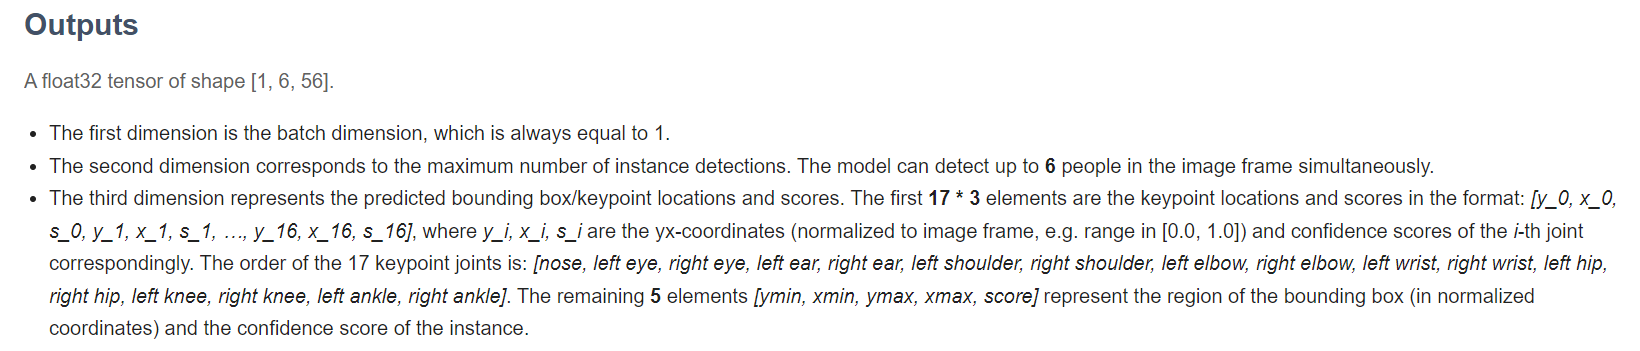
The 'head of the array is nose [4.7146323e-01, 5.6283820e-01, 4.7767827e-01] after left eye [3.8329977e-01, 6.3133341e-01, 6.4395612e-01], etc etc

nose, left eye, right eye, left ear, right ear, left shoulder, right shoulder, left elbow, right elbow, left wrist, right wrist, left hip, right hip, left knee, right knee, left ankle, right ankle.

In [19]:
def draw_keypoints(frame, keypoints, confidence_threshold): # going to pass frame, all keypoints and the score Y,X= score
    y, x, c = frame.shape # extracting the shape of the frame 
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1])) # np.squeeze make easy to Xtract the array
    
    for kp in shaped: # looping for each value of Keypoints array
        ky, kx, kp_conf = kp # extracting the coordinate of Keypoints array 
        if kp_conf > confidence_threshold: # if lets say the nose value (kp_conf) is bigger then are confidence_threshold draw
            cv2.circle(frame, (int(kx), int(ky)), 6, (105, 220, 233), -1) #6 the size of the cicle,  RGB (0,255,0) , -1 thikness 

EDGES represent the line : we say the for exemple
    (0,1) that meens the nose to the left eye

# 0=nose, 1=lefteye, 2=righteye, 3=leftear, 4=rightear, 5=leftshoulder, 6=rightshoulder, 7=leftelbow, 8=rightelbow, 9=leftwrist, 10=rightwrist, 11=lefthip, 12=righthip, 13=leftknee, 14=rightknee, 15=leftankle, 16=rightankle.

In [20]:
# from TensorFlow default model
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [21]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (105, 220, 107), 4)

In [22]:
def loop_through_people(frame, keypoints_with_scores, edges, confidence_threshold):
    for person in keypoints_with_scores:
        draw_connections(frame, person, edges, confidence_threshold)
        draw_keypoints(frame, person, confidence_threshold)

# TEST ON ME ( WEBCAM ) 

In [100]:
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 96,96)
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 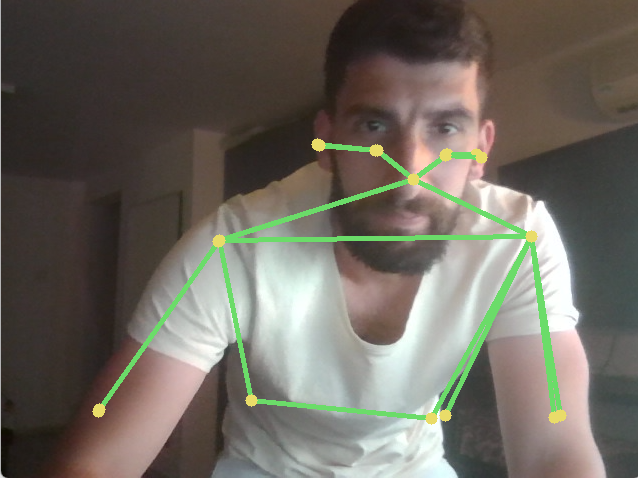

#TEST ON VIDEO

In [114]:
cap = cv2.VideoCapture("C:/Users/kevyn/Documents/ProjectsDataScience/Mbappe.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 96,96)# smaller the number faster the result but less exact 
    input_img = tf.cast(img, dtype=tf.int32)
    
    # Detection section
    Videoresults = movenet(input_img)
    keypoints_with_scores = Videoresults['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    
    # Render keypoints 
    loop_through_people(frame, keypoints_with_scores, EDGES, 0.1)
    
    cv2.imshow('Movenet Multipose', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

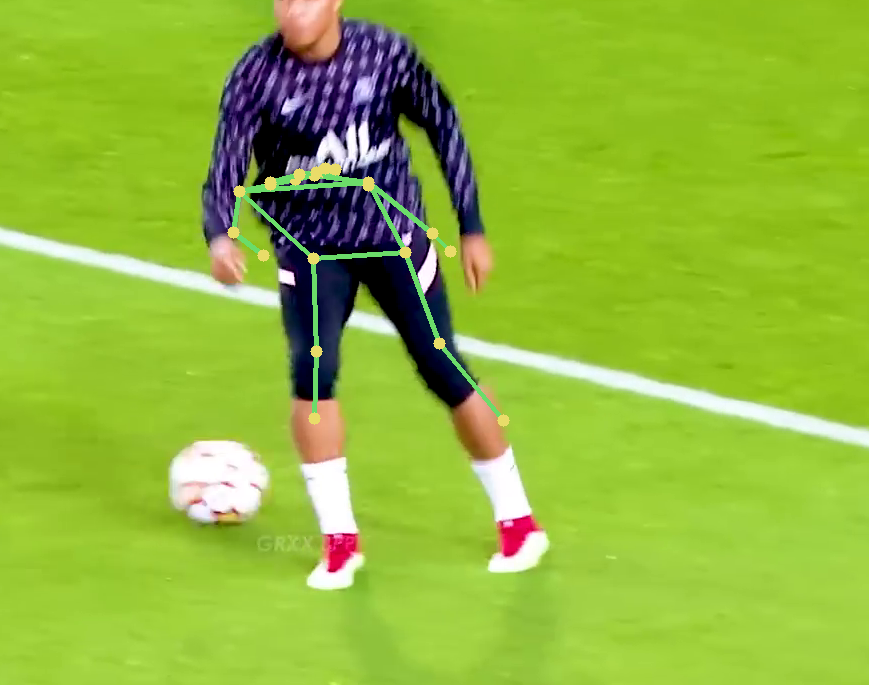